---
# Proyecto Ingenieria Financiera caso A 

David Alejandro Perez Felix

Luis Fernando Ramirez Torres


---
## planteamiento del problema 
#### Se desea disminuir el riesgo ante la volatilidad de los precios del petroleo, tanto Mexciano como Americano. 

#### Con una inversion inicial de 1 millon USD, equivalente a 12 contratos de futuro de petroleo West Texas Instrument. 

#### Esto se logra mediante un analisis de precios para la obtencion de una proyeccion del precio del barril tanto para el de Pemex como el de West Texas 

---
#### Importamos las librerias necesarias para el funcinamiento del codigo 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

#### Se carga el CSV de PEMEX para obtener los ingresos mensules,al final se suman los datos que se obtuvieron desde noviembre del 2021 hasta octubre del 2023

In [22]:
pemex_data = pd.read_csv("Pemex.csv")
archivo_csv = 'Pemex.csv'
datos = pd.read_csv(archivo_csv)
datos['Fecha'] = pd.to_datetime(datos['Fecha'])
ingresos_mensuales = datos.groupby(datos['Fecha'].dt.to_period("M"))['Total'].sum(numeric_only=True)
print("Ingresos Mensuales:")
print(ingresos_mensuales)
ingresos_totales = ingresos_mensuales.sum()
print("\nIngresos Totales:", ingresos_totales)


Ingresos Mensuales:
Fecha
2021-11    133122009.4
2021-12    128152403.8
2022-01    139822424.5
2022-02    154722876.6
2022-03    178366846.3
2022-04    180634554.7
2022-05    185071079.8
2022-06    189364282.3
2022-07    169564198.7
2022-08    153538514.4
2022-09    145027689.9
2022-10    139925345.4
2022-11    140602034.2
2022-12    126894442.7
2023-01    126092593.9
2023-02    125257179.0
2023-03    119277975.7
2023-04    127934231.5
2023-05    123856907.8
2023-06    124489117.6
2023-07    134130974.1
2023-08    144095556.9
2023-09    155351877.1
2023-10    153000820.1
Freq: M, Name: Total, dtype: float64

Ingresos Totales: 3498295936.3999996


#### Graficamos los datos de Pemex sobre los ingresos con la informacion superior 

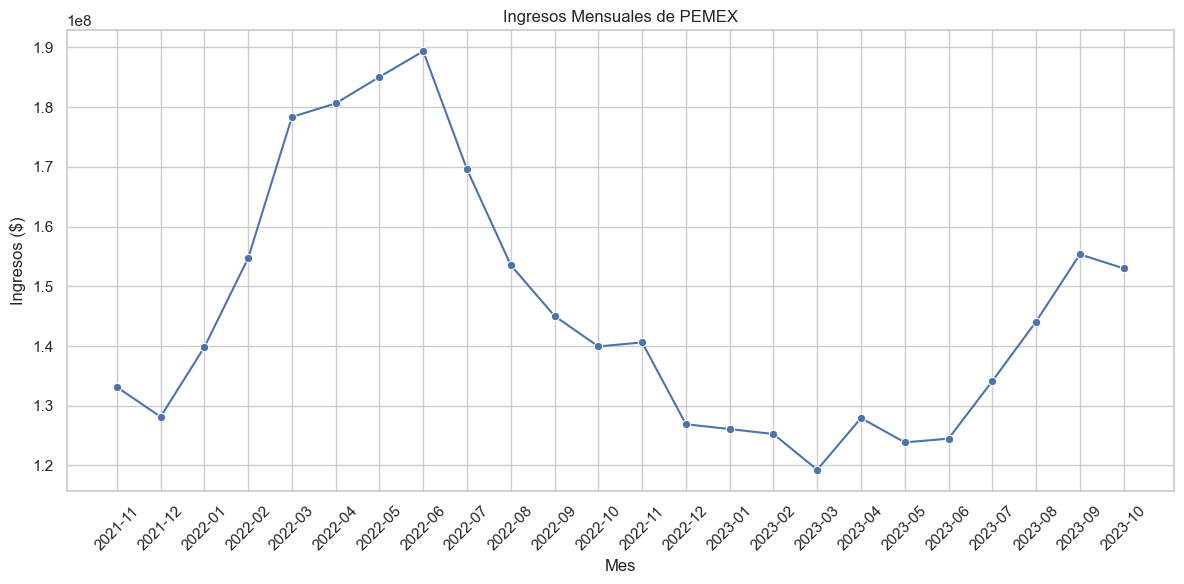

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x=ingresos_mensuales.index.astype(str), y=ingresos_mensuales.values, marker='o')
plt.title('Ingresos Mensuales de PEMEX')
plt.xlabel('Mes')
plt.ylabel('Ingresos ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Se grafica una proyeccion de datos para Octubre del 2024

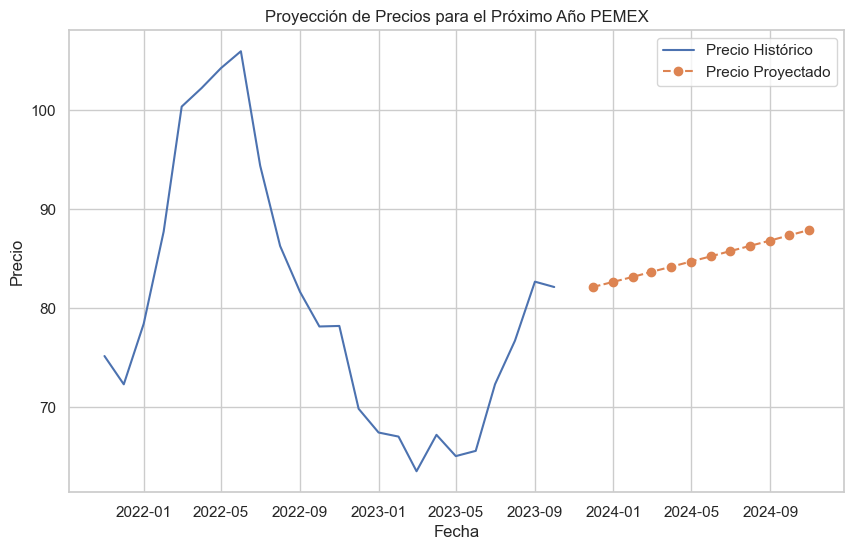

In [23]:
archivo_csv = 'Pemex.csv'
datos = pd.read_csv(archivo_csv)
datos['Fecha'] = pd.to_datetime(datos['Fecha'])
ultimos_24_meses = datos.tail(24)
tasa_crecimiento_promedio = ultimos_24_meses['Precio'].pct_change().mean()
ultimo_precio_conocido = datos['Precio'].iloc[-1]
proyeccion_precios = [ultimo_precio_conocido]
for _ in range(12):
    nuevo_precio = proyeccion_precios[-1] * (1 + tasa_crecimiento_promedio)
    proyeccion_precios.append(nuevo_precio)
fechas_proyeccion = pd.date_range(start=datos['Fecha'].iloc[-1] + pd.DateOffset(months=1), periods=12, freq='M')
df_proyeccion = pd.DataFrame({'Fecha': fechas_proyeccion, 'Precio Proyectado': proyeccion_precios[:-1]})
plt.figure(figsize=(10, 6))
plt.plot(datos['Fecha'], datos['Precio'], label='Precio Histórico')
plt.plot(df_proyeccion['Fecha'], df_proyeccion['Precio Proyectado'], label='Precio Proyectado', linestyle='dashed', marker='o')
plt.title('Proyección de Precios para el Próximo Año PEMEX')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()


#### Muestra los datos de la proyeccion de cada mes para 2024

In [25]:
print("Datos de la proyección de precios PEMEX:")
print(df_proyeccion)

Datos de la proyección de precios:
        Fecha  Precio Proyectado
0  2023-11-30          82.126000
1  2023-12-31          82.633791
2  2024-01-31          83.144723
3  2024-02-29          83.658813
4  2024-03-31          84.176082
5  2024-04-30          84.696549
6  2024-05-31          85.220234
7  2024-06-30          85.747158
8  2024-07-31          86.277339
9  2024-08-31          86.810798
10 2024-09-30          87.347556
11 2024-10-31          87.887633


#### Se juntan los datos necesarios para el histograma, simulacion montecarlo,etc.

In [5]:
archivo_csv = 'Pemex.csv'
datos = pd.read_csv(archivo_csv)
datos['Fecha'] = pd.to_datetime(datos['Fecha'])
ultimos_24_meses = datos.tail(24)
tasa_crecimiento_promedio = ultimos_24_meses['Precio'].pct_change().mean()
volatilidad = ultimos_24_meses['Precio'].pct_change().std()
ultimo_precio_conocido = datos['Precio'].iloc[-1]


#### Se obtiene la informacion para un grafico montecarlo de 100 posibilidades por un periodo de 12 meses 


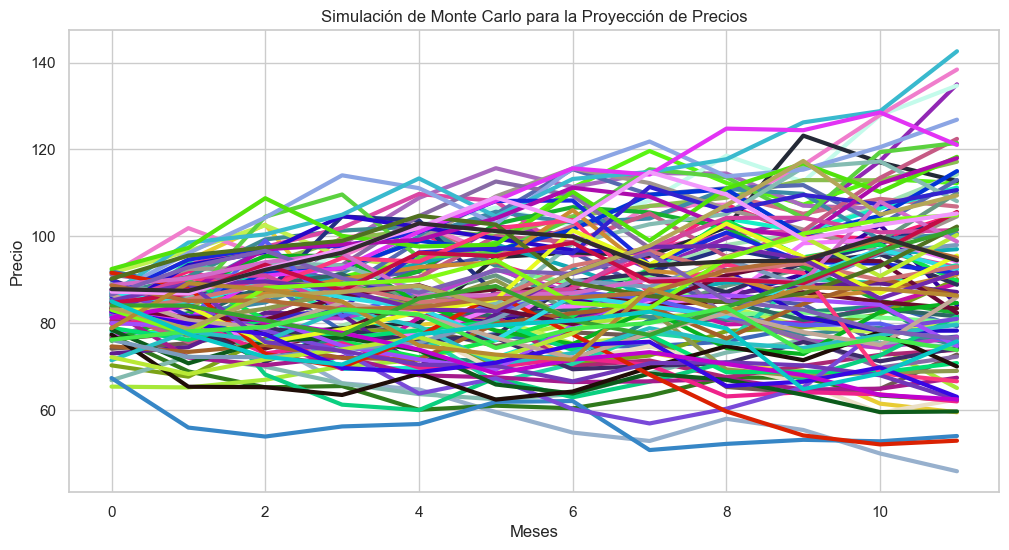

In [7]:
num_escenarios = 100
num_meses_proyeccion = 12
simulaciones = pd.DataFrame()
for i in range(num_escenarios):
    precios_simulados = [ultimo_precio_conocido]
    
    for j in range(num_meses_proyeccion):
        crecimiento_aleatorio = np.random.normal(tasa_crecimiento_promedio, volatilidad)
        nuevo_precio = precios_simulados[-1] * (1 + crecimiento_aleatorio)
        precios_simulados.append(nuevo_precio)
    
    simulaciones[f'Escenario_{i+1}'] = precios_simulados[1:]
plt.figure(figsize=(12, 6))
for col in simulaciones.columns:
    plt.plot(simulaciones[col], alpha=1, linewidth=3, linestyle='-', marker='', 
             color=np.random.rand(3,), label=col)
plt.title('Simulación de Monte Carlo para la Proyección de Precios')
plt.xlabel('Meses')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

#### A base a la integracion montecarlo, obtenemos un promedio de precio

In [15]:

linea_promedio = simulaciones.mean(axis=1)
valor_final_linea_promedio = linea_promedio.iloc[-1]
print(f"Valor final de la línea promedio: {valor_final_linea_promedio}")

Valor final de la línea promedio: 90.29691785029979


#### Agrupamos nuevamente los datos, esta vez usamos los datos de West Texas para obtener un grafico de texto 


Ingresos Totales: 1929.33


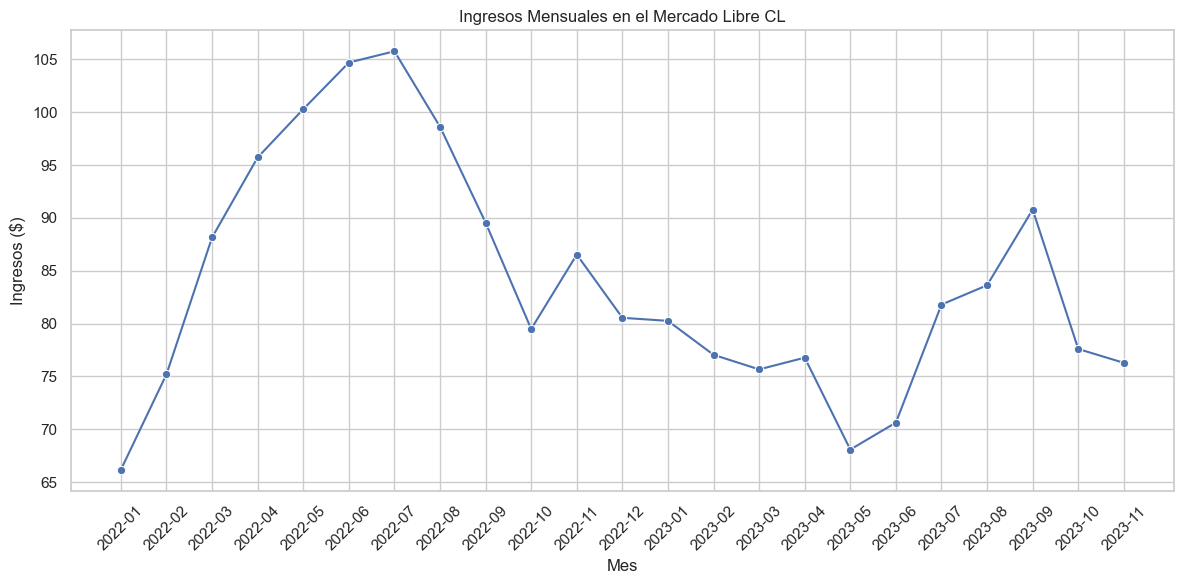

In [9]:

archivo_csv = 'Cl.csv'
datos = pd.read_csv(archivo_csv)
datos['Fecha'] = pd.to_datetime(datos['Fecha'])
datos['Precio'] = pd.to_numeric(datos['Precio'], errors='coerce')
ingresos_mensuales = datos.groupby(datos['Fecha'].dt.to_period("M"))['Precio'].sum()
ingresos_totales = ingresos_mensuales.sum()
print("\nIngresos Totales:", ingresos_totales)
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x=ingresos_mensuales.index.astype(str), y=ingresos_mensuales.values, marker='o')
plt.title('Ingresos Mensuales en el Mercado Libre CL')
plt.xlabel('Mes')
plt.ylabel('Ingresos ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Se vuelve a usar los datos del grafico superior para hacer una proyeccion de precios para Octubre del 2024, con West Texas 

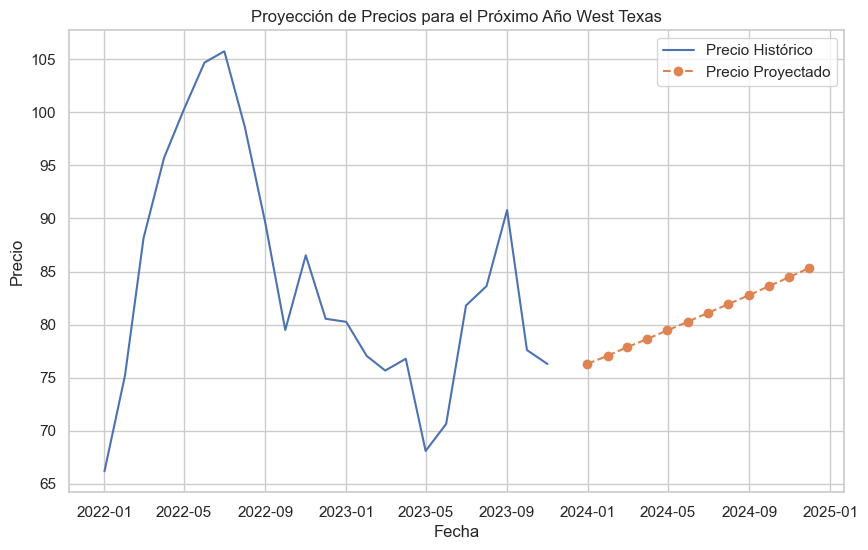

In [27]:

archivo_csv = 'Cl.csv'
datos = pd.read_csv(archivo_csv)
datos['Fecha'] = pd.to_datetime(datos['Fecha'])
ultimos_24_meses = datos.tail(24)
tasa_crecimiento_promedio = ultimos_24_meses['Precio'].pct_change().mean()
ultimo_precio_conocido = datos['Precio'].iloc[-1]
proyeccion_precios = [ultimo_precio_conocido]

for _ in range(12):
    nuevo_precio = proyeccion_precios[-1] * (1 + tasa_crecimiento_promedio)
    proyeccion_precios.append(nuevo_precio)
fechas_proyeccion = pd.date_range(start=datos['Fecha'].iloc[-1] + pd.DateOffset(months=1), periods=12, freq='M')
df_proyeccion = pd.DataFrame({'Fecha': fechas_proyeccion, 'Precio Proyectado': proyeccion_precios[:-1]})
plt.figure(figsize=(10, 6))
plt.plot(datos['Fecha'], datos['Precio'], label='Precio Histórico')
plt.plot(df_proyeccion['Fecha'], df_proyeccion['Precio Proyectado'], label='Precio Proyectado', linestyle='dashed', marker='o')
plt.title('Proyección de Precios para el Próximo Año West Texas')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()


#### Muestra los precios de los datos de la proyeccion de West Texas para 2024

In [28]:
print("Datos de la proyección de precios West Texas:")
print(df_proyeccion)

Datos de la proyección de precios West Texas:
        Fecha  Precio Proyectado
0  2023-12-31          76.290000
1  2024-01-31          77.070545
2  2024-02-29          77.859077
3  2024-03-31          78.655676
4  2024-04-30          79.460425
5  2024-05-31          80.273408
6  2024-06-30          81.094709
7  2024-07-31          81.924413
8  2024-08-31          82.762606
9  2024-09-30          83.609374
10 2024-10-31          84.464807
11 2024-11-30          85.328991


#### Se hace otra integracion montecarlo ahora con los precios de West Texas nuevamente con 100 probabilidades de precios mensuales, para el año 2024


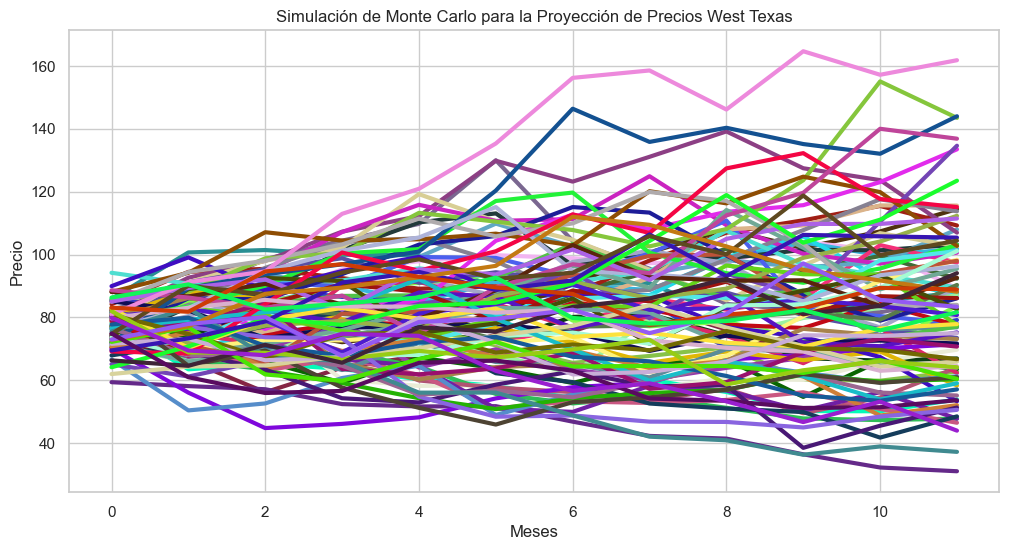

In [19]:

archivo_csv = 'Cl.csv'
datos = pd.read_csv(archivo_csv)
datos['Fecha'] = pd.to_datetime(datos['Fecha'])
ultimos_24_meses = datos.tail(24)
tasa_crecimiento_promedio = ultimos_24_meses['Precio'].pct_change().mean()
volatilidad = ultimos_24_meses['Precio'].pct_change().std()
ultimo_precio_conocido = datos['Precio'].iloc[-1]
num_escenarios = 100
num_meses_proyeccion = 12
simulaciones = pd.DataFrame()

for i in range(num_escenarios):
    precios_simulados = [ultimo_precio_conocido]
    
    for j in range(num_meses_proyeccion):
        crecimiento_aleatorio = np.random.normal(tasa_crecimiento_promedio, volatilidad)
        nuevo_precio = precios_simulados[-1] * (1 + crecimiento_aleatorio)
        precios_simulados.append(nuevo_precio)
    
    simulaciones[f'Escenario_{i+1}'] = precios_simulados[1:]
plt.figure(figsize=(12, 6))
for col in simulaciones.columns:
    plt.plot(simulaciones[col], alpha=1, linewidth=3, linestyle='-', marker='', 
             color=np.random.rand(3,), label=col)
plt.title('Simulación de Monte Carlo para la Proyección de Precios West Texas')
plt.xlabel('Meses')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

#### Imprimimos el valor del precio promedio de la integracion montecarlo para West Texas 

In [20]:

valores_finales = simulaciones.iloc[-1]
promedio_final = valores_finales.mean()
print(f"Promedio final de los escenarios simulados: {promedio_final}")

Promedio final de los escenarios simulados: 83.32367369228533


#### Se calcula la prima de la opcion

La tasa de los bonos del tesoro en USD, es del 5.12% a un año 

In [29]:

cl_data = pd.read_csv('Cl.csv')
cl_data = cl_data.tail(24)
S = 77.70 
K = 75.54
T = 1 
r = 0.0512 
sigma = np.std(cl_data['Precio'].pct_change().dropna()) * np.sqrt(252)
d1 = (np.log(S / K) + (r + (sigma ** 2) / 2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)
call_premium = S * np.exp(-r * T) * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
put_premium = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

print(f"Prima de opción de compra: {call_premium:.2f} USD")
print(f"Prima de opción de venta: {put_premium:.2f} USD")

Prima de opción de compra: 38.14 USD
Prima de opción de venta: 35.20 USD


#### Se elabora la cuenta margen "Short" de West Texas Instrument en Excel con los precios obtenidos mediante la proyeccion mensual del insturmento, con un precio strike de 83.32 USD por barril, y 12 contratos cada uno por 1,000. barriles, se obtiene un total de ganancia de 16,747 USD de los 12 contratos. 

![Cuenta margen West Texas Instrument](ingefinpro1.png)

## Se diseñan dos estrategias de coberturas cruzadas, una con futuros, y otra con opciones. 

### Estrategia 1: El futuro dentro de un año cotiza en 75.54 por barril y nuestra poryeccion es que llegue a 86.88, lo cual nos da una ganancia de 11.34 USD por barril 

### Estrategia 2: La opcion dentro de un año cotiza en 75.54 por barril, pero la diferencia es que tiene una prima de compra de 38.14 USD, por lo que nos da una perdida (si se cumple nuestra proyeccion) de 26.8 USD por barril